In [22]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import os as os
import seaborn as sb
import tools.miceutil as mt

plt.rc("axes", labelsize=15)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("xtick", direction='in')
plt.rc("ytick", direction='in')

matplotlib.rcParams['text.usetex'] = True

In [3]:
path = "./"
metafile = "./mice"
metafile2 = "../mice"

metadata = pd.read_csv(metafile, sep=' ', names=['mouse', 'type', 'offset'])
metadata2 = pd.read_csv(metafile2, sep=' ', names=['path', 'mouse', 'type', 'batch', 'start', 'end', 'n', 'm'])
metadata = metadata.set_index('mouse')
metadata2 = metadata2.set_index('mouse')

# DFA for each ndays (statics)

Use this script to analysis dfa data for each ndays which is recorded in `dfa#.result` file located in micenew/rebuild/build/.

Use the C++ function `dfa_each_ndays()` to get those data files before this script.

## Read data from dfan.result

In [4]:
dfa2 = pd.read_csv('../build/dfa2.result', sep=' ', names=['mouse', 'data', 'alpha1', 'alpha2'])
dfa3 = pd.read_csv('../build/dfa3.result', sep=' ', names=['mouse', 'data', 'alpha1', 'alpha2'])
dfa4 = pd.read_csv('../build/dfa4.result', sep=' ', names=['mouse', 'data', 'alpha1', 'alpha2'])

## Create form 

In [5]:
dfa_each_nday_data_alpha1 = pd.DataFrame([[[] for _ in range(3)] for _ in range(3)], index=['DFA2', 'DFA3', 'DFA4'], columns=['control', 'mutant', 'hyper'])
dfa_each_nday_data_alpha2 = pd.DataFrame([[[] for _ in range(3)] for _ in range(3)], index=['DFA2', 'DFA3', 'DFA4'], columns=['control', 'mutant', 'hyper'])

## Fill in data

In [6]:
length = len(dfa2)

for itera in range(length):
#     print(dfa2.iloc[itera])
#     print()
    if dfa2['mouse'][itera] in metadata.loc[metadata ['type'] == 'hyper'].index:
        dfa_each_nday_data_alpha1['hyper']['DFA2'].append(dfa2.iloc[itera]['alpha1'])
        dfa_each_nday_data_alpha2['hyper']['DFA2'].append(dfa2.iloc[itera]['alpha2'])
        dfa_each_nday_data_alpha1['hyper']['DFA3'].append(dfa3.iloc[itera]['alpha1'])
        dfa_each_nday_data_alpha2['hyper']['DFA3'].append(dfa3.iloc[itera]['alpha2'])
        dfa_each_nday_data_alpha1['hyper']['DFA4'].append(dfa4.iloc[itera]['alpha1'])
        dfa_each_nday_data_alpha2['hyper']['DFA4'].append(dfa4.iloc[itera]['alpha2'])
    elif dfa2['mouse'][itera] in metadata.loc[metadata ['type'] == 'control'].index:
        dfa_each_nday_data_alpha1['control']['DFA2'].append(dfa2.iloc[itera]['alpha1'])
        dfa_each_nday_data_alpha2['control']['DFA2'].append(dfa2.iloc[itera]['alpha2'])        
        dfa_each_nday_data_alpha1['control']['DFA3'].append(dfa3.iloc[itera]['alpha1'])
        dfa_each_nday_data_alpha2['control']['DFA3'].append(dfa3.iloc[itera]['alpha2'])
        dfa_each_nday_data_alpha1['control']['DFA4'].append(dfa4.iloc[itera]['alpha1'])
        dfa_each_nday_data_alpha2['control']['DFA4'].append(dfa4.iloc[itera]['alpha2'])
    elif dfa2['mouse'][itera] in metadata.loc[metadata ['type'] == 'mutant'].index:
        dfa_each_nday_data_alpha1['mutant']['DFA2'].append(dfa2.iloc[itera]['alpha1'])
        dfa_each_nday_data_alpha2['mutant']['DFA2'].append(dfa2.iloc[itera]['alpha2'])
        dfa_each_nday_data_alpha1['mutant']['DFA3'].append(dfa3.iloc[itera]['alpha1'])
        dfa_each_nday_data_alpha2['mutant']['DFA3'].append(dfa3.iloc[itera]['alpha2'])        
        dfa_each_nday_data_alpha1['mutant']['DFA4'].append(dfa4.iloc[itera]['alpha1'])
        dfa_each_nday_data_alpha2['mutant']['DFA4'].append(dfa4.iloc[itera]['alpha2'])

In [7]:
dfa_each_nday_data_alpha1, dfa_each_nday_data_alpha2

(                                                control  \
 DFA2  [0.801481, 0.858243, 0.849617, 0.911575, 0.888...   
 DFA3  [0.794444, 0.865385, 0.852228, 0.909763, 0.904...   
 DFA4  [0.689552, 0.77688, 0.748378, 0.820331, 0.7857...   
 
                                                  mutant  \
 DFA2  [0.817001, 0.828098, 0.823883, 0.879571, 0.812...   
 DFA3  [0.814403, 0.832952, 0.823687, 0.876956, 0.811...   
 DFA4  [0.70948, 0.723231, 0.703902, 0.782244, 0.7060...   
 
                                                   hyper  
 DFA2  [1.02879, 1.00894, 1.01454, 1.03039, 1.02717, ...  
 DFA3  [1.03226, 1.00151, 1.03207, 1.0558, 1.05427, 1...  
 DFA4  [0.933133, 0.931068, 0.946171, 0.97475, 0.9916...  ,
                                                 control  \
 DFA2  [0.720878, 0.513454, 0.793788, 0.530175, 0.436...   
 DFA3  [0.709483, 0.60131, 0.741742, 0.632125, 0.4745...   
 DFA4  [0.75642, 0.632397, 0.807416, 0.721603, 0.5617...   
 
                                     

(array([ 1.45934612,  1.45934612,  4.37803836, 10.21542284,  8.75607672,
         2.91869224,  4.37803836,  7.2967306 ,  2.91869224,  4.37803836]),
 array([0.958442 , 0.9792068, 0.9999716, 1.0207364, 1.0415012, 1.062266 ,
        1.0830308, 1.1037956, 1.1245604, 1.1453252, 1.16609  ]),
 <BarContainer object of 10 artists>)

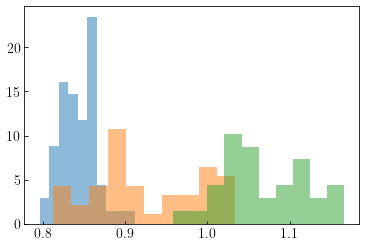

In [8]:
plt.hist(dfa_each_nday_data_alpha1['control']['DFA2'], density=True, alpha=0.5)
plt.hist(dfa_each_nday_data_alpha1['mutant']['DFA2'], density=True, alpha=0.5)
plt.hist(dfa_each_nday_data_alpha1['hyper']['DFA2'], density=True, alpha=0.5)

(array([0.645771  , 1.93731301, 3.22885501, 2.26019851, 1.291542  ,
        0.3228855 , 0.3228855 , 0.3228855 , 0.        , 0.3228855 ]),
 array([0.363053 , 0.4569037, 0.5507544, 0.6446051, 0.7384558, 0.8323065,
        0.9261572, 1.0200079, 1.1138586, 1.2077093, 1.30156  ]),
 <BarContainer object of 10 artists>)

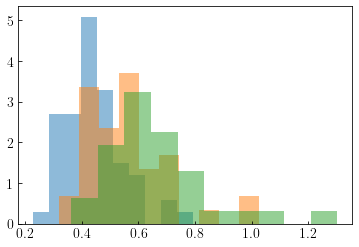

In [9]:
plt.hist(dfa_each_nday_data_alpha2['control']['DFA2'], density=True, alpha=0.5)
plt.hist(dfa_each_nday_data_alpha2['mutant']['DFA2'], density=True, alpha=0.5)
plt.hist(dfa_each_nday_data_alpha2['hyper']['DFA2'], density=True, alpha=0.5)

(array([1.36815058, 2.73630115, 0.        , 8.20890346, 5.47260231,
        8.20890346, 2.73630115, 5.47260231, 5.47260231, 5.47260231]),
 array([0.957281 , 0.9794299, 1.0015788, 1.0237277, 1.0458766, 1.0680255,
        1.0901744, 1.1123233, 1.1344722, 1.1566211, 1.17877  ]),
 <BarContainer object of 10 artists>)

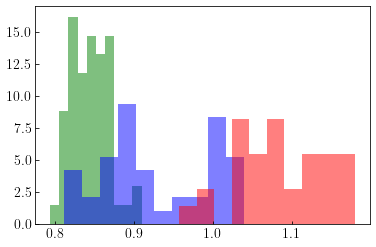

In [10]:
plt.hist(dfa_each_nday_data_alpha1['control']['DFA3'], density=True, alpha=0.5, color='g')
plt.hist(dfa_each_nday_data_alpha1['mutant']['DFA3'], density=True, alpha=0.5, color='b')
plt.hist(dfa_each_nday_data_alpha1['hyper']['DFA3'], density=True, alpha=0.5, color='r')

(array([0.34504545, 1.72522726, 4.14054543, 0.69009091, 1.38018181,
        1.38018181, 1.03513636, 0.        , 0.34504545, 0.34504545]),
 array([0.382697 , 0.4705203, 0.5583436, 0.6461669, 0.7339902, 0.8218135,
        0.9096368, 0.9974601, 1.0852834, 1.1731067, 1.26093  ]),
 <BarContainer object of 10 artists>)

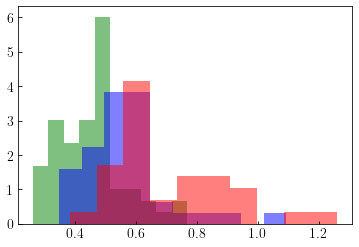

In [11]:
plt.hist(dfa_each_nday_data_alpha2['control']['DFA3'], density=True, alpha=0.5, color='g')
plt.hist(dfa_each_nday_data_alpha2['mutant']['DFA3'], density=True, alpha=0.5, color='b')
plt.hist(dfa_each_nday_data_alpha2['hyper']['DFA3'], density=True, alpha=0.5, color='r')

In [12]:
from scipy.stats import ttest_ind

# significance test for alpha 2

In [13]:
print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha2['hyper']['DFA2'], dfa_each_nday_data_alpha2['control']['DFA2']).pvalue)

print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha2['control']['DFA2'], dfa_each_nday_data_alpha2['mutant']['DFA2']).pvalue)

print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha2['hyper']['DFA2'], dfa_each_nday_data_alpha2['mutant']['DFA2']).pvalue)

period var [control vs. mutant] 2.3114608556186706e-10
period var [control vs. mutant] 1.0412642262001708e-05
period var [control vs. mutant] 0.01305563222251088


In [14]:
print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha2['hyper']['DFA3'], dfa_each_nday_data_alpha2['control']['DFA3']).pvalue)

print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha2['control']['DFA3'], dfa_each_nday_data_alpha2['mutant']['DFA3']).pvalue)

print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha2['hyper']['DFA3'], dfa_each_nday_data_alpha2['mutant']['DFA3']).pvalue)

period var [control vs. mutant] 6.818854486418016e-12
period var [control vs. mutant] 4.1731227250218525e-05
period var [control vs. mutant] 0.00040816746988623455


# significance test for alpha 1

In [15]:
print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha1['hyper']['DFA3'], dfa_each_nday_data_alpha1['control']['DFA3']).pvalue)

print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha1['control']['DFA3'], dfa_each_nday_data_alpha1['mutant']['DFA3']).pvalue)

print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha1['hyper']['DFA3'], dfa_each_nday_data_alpha1['mutant']['DFA3']).pvalue)

period var [control vs. mutant] 2.9899593288626113e-47
period var [control vs. mutant] 3.551501003655044e-14
period var [control vs. mutant] 1.7971437068666084e-16


In [16]:
print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha1['hyper']['DFA2'], dfa_each_nday_data_alpha1['control']['DFA2']).pvalue)

print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha1['control']['DFA2'], dfa_each_nday_data_alpha1['mutant']['DFA2']).pvalue)

print ('period var [control vs. mutant]', ttest_ind(dfa_each_nday_data_alpha1['hyper']['DFA2'], dfa_each_nday_data_alpha1['mutant']['DFA2']).pvalue)

period var [control vs. mutant] 6.380170327900513e-48
period var [control vs. mutant] 1.7207213449841904e-14
period var [control vs. mutant] 1.480996735004492e-15


## Scatter plot of alpha2 vs. alpha1

In [17]:
dfa_order = 3
DFA = 'DFA{}'.format(dfa_order)

Saving figure:  /home/yiwen/mice_physiology/micenew/rebuild/group_average/dfa3_each_ndays_scattering.pdf


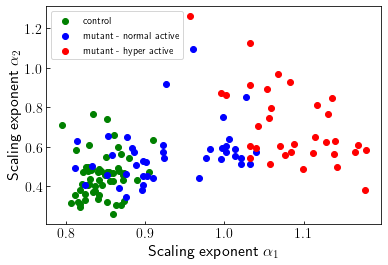

In [18]:
plt.scatter(x=dfa_each_nday_data_alpha1['control'][DFA], y=dfa_each_nday_data_alpha2['control'][DFA], label="control", color='g')

plt.scatter(x=dfa_each_nday_data_alpha1['mutant'][DFA], y=dfa_each_nday_data_alpha2['mutant'][DFA], label="mutant - normal active", color='b')

plt.scatter(x=dfa_each_nday_data_alpha1['hyper'][DFA], y=dfa_each_nday_data_alpha2['hyper'][DFA], label="mutant - hyper active", color='r')

plt.legend(loc='best')

plt.xlabel(r'Scaling exponent $\alpha_1$', fontsize=16)
plt.ylabel(r'Scaling exponent $\alpha_2$', fontsize=16)

plt.savefig('dfa{}_each_ndays_scattering.pdf'.format(dfa_order))

print('Saving figure: ','{}/dfa{}_each_ndays_scattering.pdf'.format(os.getcwd(), dfa_order))

## Draw Histogram individually

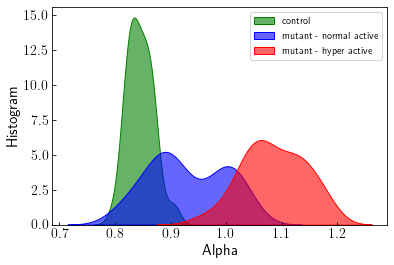

In [19]:
sb.kdeplot(x=dfa_each_nday_data_alpha1['control'][DFA], fill=True, alpha=0.6, label="control", color='g')
sb.kdeplot(x=dfa_each_nday_data_alpha1['mutant'][DFA], fill=True, alpha=0.6, label="mutant - normal active", color='b')
sb.kdeplot(x=dfa_each_nday_data_alpha1['hyper'][DFA], fill=True, alpha=0.6, label="mutant - hyper active", color='r')
plt.ylabel("Histogram")
plt.xlabel("Alpha")
plt.legend()

## Draw DFA histogram together

In [23]:
fig = plt.figure()
gs = fig.add_gridspec(2,1, hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
# ax.yaxis.set_label_position("right")
# ax.yaxis.tick_right()
ax.set_ylabel('Histogram')
ax.set_xlabel('Scaling exponent α')

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
alpha1 = fig.add_subplot(gs[0,0])
alpha2 = fig.add_subplot(gs[1,0], sharex=alpha1)

alpha1.set_yticks(np.arange(2, 16, 4))
alpha2.set_yticks(np.arange(0, 5, 1))
alpha2.set_xticks(np.arange(0, 1.6, 0.2))

sb.kdeplot(ax=alpha1, x=dfa_each_nday_data_alpha1['control'][DFA], fill=True, alpha=0.6, label="control", color='g')
sb.kdeplot(ax=alpha1, x=dfa_each_nday_data_alpha1['mutant'][DFA], fill=True, alpha=0.6, label="mutant - normal active", color='b')
sb.kdeplot(ax=alpha1, x=dfa_each_nday_data_alpha1['hyper'][DFA], fill=True, alpha=0.6, label="mutant - hyper active", color='r')

sb.kdeplot(ax=alpha2, x=dfa_each_nday_data_alpha2['control'][DFA], fill=True, alpha=0.6, label="control" , color='g')
sb.kdeplot(ax=alpha2, x=dfa_each_nday_data_alpha2['mutant'][DFA], fill=True, alpha=0.6, label="mutant - normal active", color='b')
sb.kdeplot(ax=alpha2, x=dfa_each_nday_data_alpha2['hyper'][DFA], fill=True, alpha=0.6, label="mutant - hyper active", color='r')
alpha1.set_ylabel('')
alpha2.set_ylabel('')

# alpha1.yaxis.tick_right()
# alpha2.yaxis.tick_right()

alpha1.legend(loc='upper left')

plt.savefig('dfa{}_each_ndays.pdf'.format(dfa_order))

print('Saving figure: ','{}/dfa{}_each_ndays.pdf'.format(os.getcwd(), dfa_order))

RuntimeError: latex was not able to process the following string:
b'Scaling exponent \\u03b1'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/yiwen/.cache/matplotlib/tex.cache/a88d7e9537a547714344bffdefa6b56c.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./a88d7e9537a547714344bffdefa6b56c.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! Package inputenc Error: Unicode character α (U+03B1)
(inputenc)                not set up for use with LaTeX.

See the inputenc package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.19 {\sffamily Scaling exponent α
                                   }
No pages of output.
Transcript written on a88d7e9537a547714344bffdefa6b56c.log.




RuntimeError: latex was not able to process the following string:
b'Scaling exponent \\u03b1'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/yiwen/.cache/matplotlib/tex.cache/a88d7e9537a547714344bffdefa6b56c.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./a88d7e9537a547714344bffdefa6b56c.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! Package inputenc Error: Unicode character α (U+03B1)
(inputenc)                not set up for use with LaTeX.

See the inputenc package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.19 {\sffamily Scaling exponent α
                                   }
No pages of output.
Transcript written on a88d7e9537a547714344bffdefa6b56c.log.




<Figure size 432x288 with 3 Axes>

## Draw a 2D histogram for DFA in each ndays

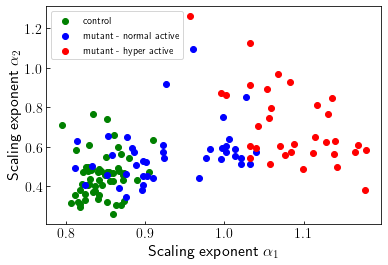

In [24]:
plt.scatter(x=dfa_each_nday_data_alpha1['control'][DFA], y=dfa_each_nday_data_alpha2['control'][DFA], label="control", color='g')

plt.scatter(x=dfa_each_nday_data_alpha1['mutant'][DFA], y=dfa_each_nday_data_alpha2['mutant'][DFA], label="mutant - normal active", color='b')

plt.scatter(x=dfa_each_nday_data_alpha1['hyper'][DFA], y=dfa_each_nday_data_alpha2['hyper'][DFA], label="mutant - hyper active", color='r')

# plt.plot([0, 2], [0, 2], 'k--')

# plt.xlim(0.7, 1.2)
# plt.ylim(0.2, 1.2)

plt.xlabel(r'Scaling exponent $\alpha_1$', fontsize=16)
plt.ylabel(r'Scaling exponent $\alpha_2$', fontsize=16)

plt.legend()

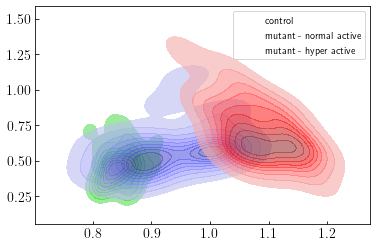

In [25]:

sb.kdeplot(x=dfa_each_nday_data_alpha1['control'][DFA], y=dfa_each_nday_data_alpha2['control'][DFA], fill=True, alpha=0.6, label="control", color='g')

sb.kdeplot(x=dfa_each_nday_data_alpha1['mutant'][DFA], y=dfa_each_nday_data_alpha2['mutant'][DFA], fill=True, alpha=0.6, label="mutant - normal active", color='b')

sb.kdeplot(x=dfa_each_nday_data_alpha1['hyper'][DFA], y=dfa_each_nday_data_alpha2['hyper'][DFA], fill=True, alpha=0.6, label="mutant - hyper active", color='r')

plt.legend()

# DFA during whole length

## Read Data

In [26]:
dfa_path = '/home/yiwen/mice_physiology/micenew/rebuild/group_average/'

## DFA Plot 
orders: 
1. original activity 2
2. original activity 3
3. filter activity 2
4. filter activity 3

In [27]:
suffix = 'real_ori'
midfix = '_selected_activity_dfa2'

mididx:  38
endidx:  52

55 pre:  [0.83878116 1.87645009]
55 aft:  [0.57767985 1.99568736]
12Otx2 pre:  [0.84424401 2.15579568]
12Otx2 aft:  [0.77383354 2.16142185]
51M pre:  [1.03996484 2.90910751]
51M aft:  [1.00480589 2.77169084]


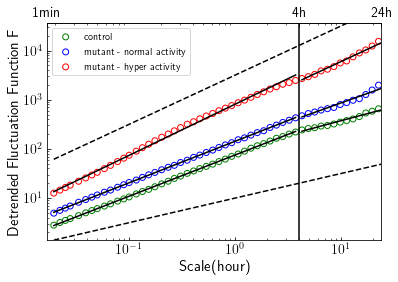

In [28]:
name = '55'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt") 
data[:,0] /= 360

#### Find the boundary of lines 
idx=0
breakpoint = 4
breakpoint2 = 24
while data[idx,0] < breakpoint:
    idx += 1
idx -= 1
print ('mididx: ', idx)
idx2=idx + 1
while data[idx2,0] < breakpoint2:
    idx2 += 1
print ('endidx: ', idx2)
prex = np.array([data[0,0], data[idx,0]])
aftx = np.array([data[idx+1,0], data[idx2,0]])
print()

plt.scatter(data[:,0], data[:,1], color='g', label='control', facecolors='none')
maxi = np.max(data[:,1])
mini = np.min(data[:,1])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

name = '12Otx2'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt")
data[:,0] /= 360

plt.scatter(data[:,0], data[:,1], color='b', label='mutant - normal activity', facecolors='none')
maxi = np.max([data[:,1].max(), maxi])
mini = np.min([data[:,1].min(), mini])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

name = '51M'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt")
data[:,0] /= 360
data[:,1] *= 2

plt.scatter(data[:,0], data[:,1], color='r', label='mutant - hyper activity', facecolors='none')
maxi = np.max([data[:,1].max(), maxi])
mini = np.min([data[:,1].min(), mini])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

plt.xscale('log')
plt.yscale('log')

plt.vlines(4, 0, maxi, color='k')

plt.xlim(0.01666, 24)
plt.ylim(mini * 0.5, maxi)

plt.legend(loc='best')

plt.ylabel('Detrended Fluctuation Function F')
plt.xlabel('Scale(hour)')

overallx = np.array([prex[0], aftx[1]])
plt.plot(overallx, 10** 3.5 * np.power(overallx, 1.0), '--k')
plt.plot(overallx, 10** 1 * np.power(overallx, 0.5), '--k')

ax = plt.gca()
second_xax = ax.secondary_xaxis("top")

second_xax.set_xticks([1 / 60, 4, 24])
second_xax.set_xticklabels(['1min', '4h', '24h'])

plt.savefig('{}_overall_individuals.pdf'.format(midfix))

plt.show()

mididx:  36
endidx:  50

55 pre:  [0.83813373 1.765779  ]
55 aft:  [0.50627887 1.97733151]
12Otx2 pre:  [0.84249915 2.04188431]
12Otx2 aft:  [0.67757048 2.14412062]
56Otx2 pre:  [1.06396892 2.66931908]
56Otx2 aft:  [0.97675706 2.61345923]


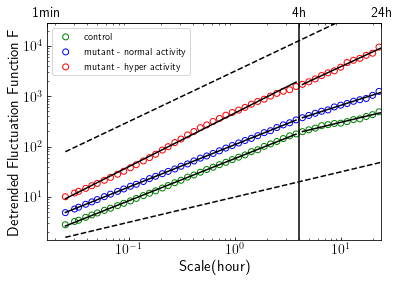

In [29]:
suffix = 'real_ori'
midfix = '_selected_activity_dfa3'

name = '55'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt") 
data[:,0] /= 360

#### Find the boundary of lines 
idx=0
breakpoint = 4
breakpoint2 = 24
while data[idx,0] < breakpoint:
    idx += 1
idx -= 1
print ('mididx: ', idx)
idx2=idx + 1
while data[idx2,0] < breakpoint2:
    idx2 += 1
print ('endidx: ', idx2)
prex = np.array([data[0,0], data[idx,0]])
aftx = np.array([data[idx+1,0], data[idx2,0]])
print()

plt.scatter(data[:,0], data[:,1], color='g', label='control', facecolors='none')
maxi = np.max(data[:,1])
mini = np.min(data[:,1])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

name = '12Otx2'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt")
data[:,0] /= 360

plt.scatter(data[:,0], data[:,1], color='b', label='mutant - normal activity', facecolors='none')
maxi = np.max([data[:,1].max(), maxi])
mini = np.min([data[:,1].min(), mini])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

name = '56Otx2'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt")
data[:,0] /= 360
data[:,1] *= 2

plt.scatter(data[:,0], data[:,1], color='r', label='mutant - hyper activity', facecolors='none')
maxi = np.max([data[:,1].max(), maxi])
mini = np.min([data[:,1].min(), mini])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

plt.xscale('log')
plt.yscale('log')

plt.vlines(4, 0, maxi, color='k')

plt.xlim(0.01666, 24)
plt.ylim(mini * 0.5, maxi)

plt.legend(loc='best')

plt.ylabel('Detrended Fluctuation Function F')
plt.xlabel('Scale(hour)')

overallx = np.array([prex[0], aftx[1]])
plt.plot(overallx, 10** 3.5 * np.power(overallx, 1.0), '--k')
plt.plot(overallx, 10** 1 * np.power(overallx, 0.5), '--k')

ax = plt.gca()
second_xax = ax.secondary_xaxis("top")

second_xax.set_xticks([1 / 60, 4, 24])
second_xax.set_xticklabels(['1min', '4h', '24h'])

plt.savefig('{}_overall_individuals.pdf'.format(midfix))

plt.show()

mididx:  38
endidx:  52

55 pre:  [0.8346553  7.36489655]
55 aft:  [0.42551618 7.58252453]
12Otx2 pre:  [0.84174166 7.64603268]
12Otx2 aft:  [0.53160639 7.80883093]
56Otx2 pre:  [1.04905851 8.29250228]
56Otx2 aft:  [0.71580018 8.40885999]


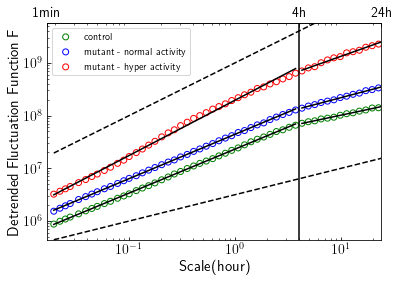

In [30]:
suffix = 'real_ori'
midfix = '_selected_activity_filter_dfa2'

name = '55'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt") 
data[:,0] /= 360

#### Find the boundary of lines 
idx=0
breakpoint = 4
breakpoint2 = 24
while data[idx,0] < breakpoint:
    idx += 1
idx -= 1
print ('mididx: ', idx)
idx2=idx + 1
while data[idx2,0] < breakpoint2:
    idx2 += 1
print ('endidx: ', idx2)
prex = np.array([data[0,0], data[idx,0]])
aftx = np.array([data[idx+1,0], data[idx2,0]])
print()

plt.scatter(data[:,0], data[:,1], color='g', label='control', facecolors='none')
maxi = np.max(data[:,1])
mini = np.min(data[:,1])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

name = '12Otx2'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt")
data[:,0] /= 360

plt.scatter(data[:,0], data[:,1], color='b', label='mutant - normal activity', facecolors='none')
maxi = np.max([data[:,1].max(), maxi])
mini = np.min([data[:,1].min(), mini])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

name = '56Otx2'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt")
data[:,0] /= 360
data[:,1] *= 2

plt.scatter(data[:,0], data[:,1], color='r', label='mutant - hyper activity', facecolors='none')
maxi = np.max([data[:,1].max(), maxi])
mini = np.min([data[:,1].min(), mini])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

plt.xscale('log')
plt.yscale('log')

plt.vlines(4, 0, maxi, color='k')

plt.xlim(0.01666, 24)
plt.ylim(mini * 0.5, maxi)

plt.legend(loc='best')

plt.ylabel('Detrended Fluctuation Function F')
plt.xlabel('Scale(hour)')

overallx = np.array([prex[0], aftx[1]])
plt.plot(overallx, 10** 9 * np.power(overallx, 1.0), '--k')
plt.plot(overallx, 10** 6.5 * np.power(overallx, 0.5), '--k')

ax = plt.gca()
second_xax = ax.secondary_xaxis("top")

second_xax.set_xticks([1 / 60, 4, 24])
second_xax.set_xticklabels(['1min', '4h', '24h'])

plt.savefig('{}_overall_individuals.pdf'.format(midfix))

plt.show()

mididx:  36
endidx:  50

55 pre:  [0.8361064  7.25671622]
55 aft:  [0.44229435 7.50159569]
12Otx2 pre:  [0.84191307 7.5341113 ]
12Otx2 aft:  [0.57786973 7.69137196]
56Otx2 pre:  [1.063866   8.16211769]
56Otx2 aft:  [0.77604054 8.24981939]


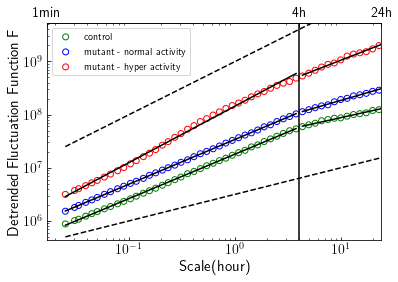

In [31]:
suffix = 'real_ori'
midfix = '_selected_activity_filter_dfa3'

name = '55'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt") 
data[:,0] /= 360

#### Find the boundary of lines 
idx=0
breakpoint = 4
breakpoint2 = 24
while data[idx,0] < breakpoint:
    idx += 1
idx -= 1
print ('mididx: ', idx)
idx2=idx + 1
while data[idx2,0] < breakpoint2:
    idx2 += 1
print ('endidx: ', idx2)
prex = np.array([data[0,0], data[idx,0]])
aftx = np.array([data[idx+1,0], data[idx2,0]])
print()

plt.scatter(data[:,0], data[:,1], color='g', label='control', facecolors='none')
maxi = np.max(data[:,1])
mini = np.min(data[:,1])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

name = '12Otx2'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt")
data[:,0] /= 360

plt.scatter(data[:,0], data[:,1], color='b', label='mutant - normal activity', facecolors='none')
maxi = np.max([data[:,1].max(), maxi])
mini = np.min([data[:,1].min(), mini])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

name = '56Otx2'
data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt")
data[:,0] /= 360
data[:,1] *= 2

plt.scatter(data[:,0], data[:,1], color='r', label='mutant - hyper activity', facecolors='none')
maxi = np.max([data[:,1].max(), maxi])
mini = np.min([data[:,1].min(), mini])

prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

print(name + " pre: ", prefit)
print(name + " aft: ", aftfit)

plt.xscale('log')
plt.yscale('log')

plt.vlines(4, 0, maxi, color='k')

plt.xlim(0.01666, 24)
plt.ylim(mini * 0.5, maxi)

plt.legend(loc='best')

plt.ylabel('Detrended Fluctuation Function F')
plt.xlabel('Scale(hour)')

overallx = np.array([prex[0], aftx[1]])
plt.plot(overallx, 10** 9 * np.power(overallx, 1.0), '--k')
plt.plot(overallx, 10** 6.5 * np.power(overallx, 0.5), '--k')

ax = plt.gca()
second_xax = ax.secondary_xaxis("top")

second_xax.set_xticks([1 / 60, 4, 24])
second_xax.set_xticklabels(['1min', '4h', '24h'])

plt.savefig('{}_overall_individuals.pdf'.format(midfix))

plt.show()

In [32]:
suffix = 'real_ori'
midfix = '_selected_activity_dfa2'

In [33]:
for name in metadata.index:

    data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt")

    data[:,0] /= 360

    #### Find the boundary of lines 
    idx=0
    breakpoint = 4
    breakpoint2 = 24
    while data[idx,0] < breakpoint:
        idx += 1
    idx -= 1
    idx2=idx + 1
    while data[idx2,0] < breakpoint2:
        idx2 += 1
    prex = np.array([data[0,0], data[idx,0]])
    aftx = np.array([data[idx+1,0], data[idx2,0]])

    prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
    aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
    
    metadata.loc[name, 'dfa pre'] = prefit[0]
    metadata.loc[name, 'dfa aft'] = aftfit[0]

#     print(name + " pre: ", prefit)
#     print(name + " aft: ", aftfit)

In [34]:
hypertype = metadata.loc[metadata ['type'] == 'hyper']
mutanttype = metadata.loc[metadata ['type'] == 'mutant']
controltype = metadata.loc[metadata ['type'] == 'control']

## DFA alphas for the whole data (scatter plot)

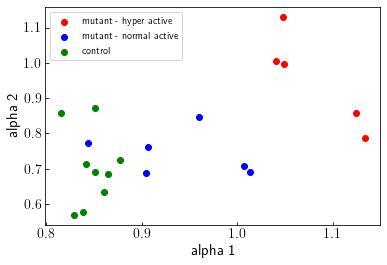

In [35]:
plt.scatter(x=hypertype.loc[:,'dfa pre'], y=hypertype.loc[:,'dfa aft'], label='mutant - hyper active', color='r')
plt.scatter(x=mutanttype.loc[:,'dfa pre'], y=mutanttype.loc[:,'dfa aft'], label='mutant - normal active', color='b')
plt.scatter(x=controltype.loc[:,'dfa pre'], y=controltype.loc[:,'dfa aft'], label='control', color='g')
# plt.plot([0, 2], [0, 2], 'k--')

plt.ylabel('alpha 2')
plt.xlabel('alpha 1')

# plt.xlim(0.5, 1.2)
# plt.ylim(0.5, 1.2)

plt.legend(loc='best')

plt.savefig('{}_dfa_alldays_scatter_plot.pdf'.format(midfix))

In [36]:
controltype.loc[controltype ['dfa aft'] >= 0.7]

,type,offset,dfa pre,dfa aft
mouse,,,,
83WT,control,0,0.876840,0.725565
53,control,45,0.841520,0.714216
61,control,89,0.815172,0.858696
67,control,90,0.850686,0.872012


In [37]:
mutanttype.loc[mutanttype ['dfa pre'] <= 0.9]

,type,offset,dfa pre,dfa aft
mouse,,,,
12Otx2,mutant,0,0.844244,0.773834


In [38]:
hypertype.loc[hypertype ['dfa aft'] >= 0.9]

,type,offset,dfa pre,dfa aft
mouse,,,,
56Otx2,hyper,0,1.049338,0.997299
73Otx2,hyper,0,1.047354,1.129634
51M,hyper,46,1.039965,1.004806


In [39]:
from sklearn.cluster import KMeans

In [40]:
X = metadata.loc[:,['dfa pre']].values
X_plot = metadata.loc[:,['dfa pre', 'dfa aft']].values

In [41]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_plot)

In [42]:
labels = kmeans.predict(X_plot)

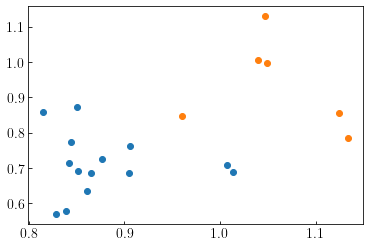

In [43]:
for i in range(2):
    plt.scatter(X_plot[labels==i, 0], X_plot[labels==i, 1])

In [44]:
hypertype = metadata.loc[metadata ['type'] == 'hyper']

In [45]:
hypertype

,type,offset,dfa pre,dfa aft
mouse,,,,
56Otx2,hyper,0,1.049338,0.997299
73Otx2,hyper,0,1.047354,1.129634
51M,hyper,46,1.039965,1.004806
68M,hyper,80,1.133582,0.785757
62M,hyper,69,1.124148,0.856532


56Otx2
56Otx2 pre:  [1.07486627 7.86653121]
56Otx2 aft:  [0.84050078 7.88804862]

73Otx2
73Otx2 pre:  [1.03671616 8.10884322]
73Otx2 aft:  [0.88632596 8.15743088]

51M
51M pre:  [1.11686151 8.0359206 ]
51M aft:  [0.7853402  7.99350233]

68M
68M pre:  [1.05748568 7.68767186]
68M aft:  [0.76126556 7.85389065]

62M
62M pre:  [1.1135869  7.78269882]
62M aft:  [0.82090552 7.85568632]



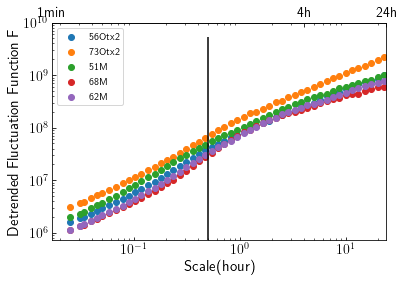

In [46]:
suffix = 'real_ori'
midfix = '_selected_activity_filter_dfa3'

breakpoint = 0.5
breakpoint2 = 24

for name in hypertype.index:
    print (name)
    
    data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt") 
    data[:,0] /= 360
    
    idx=0

    while data[idx,0] < breakpoint:
        idx += 1
    idx -= 1
#     print ('mididx: ', idx)
    idx2=idx + 1
    while data[idx2,0] < breakpoint2:
        idx2 += 1
#     print ('endidx: ', idx2)
    prex = np.array([data[0,0], data[idx,0]])
    aftx = np.array([data[idx+1,0], data[idx2,0]])
    
    ## original 
    x = data[:,0]
    y = data[:,1]
    
    ## slope
#     x = data[1:,0]
#     y = data[1:,1] - data[:-1,1]
#     y = y / (data[1:,0] - data[:-1,0])
    plt.scatter(x,y, label=name)
    
    prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
    aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
#     plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
#     plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

    print(name + " pre: ", prefit)
    print(name + " aft: ", aftfit)

    print()

plt.xscale('log')
plt.yscale('log')

plt.vlines(breakpoint, 0, maxi, color='k')

plt.xlim(0.01666, 24)
# plt.ylim(mini * 0.5, maxi)

plt.legend(loc='best')

plt.ylabel('Detrended Fluctuation Function F')
plt.xlabel('Scale(hour)')

# overallx = np.array([prex[0], aftx[1]])
# plt.plot(overallx, 10** 9 * np.power(overallx, 1.0), '--k')
# plt.plot(overallx, 10** 6.5 * np.power(overallx, 0.5), '--k')

ax = plt.gca()
second_xax = ax.secondary_xaxis("top")

second_xax.set_xticks([1 / 60, 4, 24])
second_xax.set_xticklabels(['1min', '4h', '24h'])

# plt.savefig('{}_overall_individuals.pdf'.format(midfix))

plt.show()

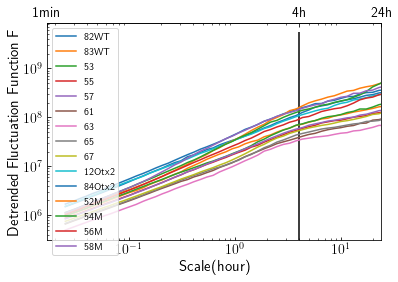

In [47]:
suffix = 'real_ori'
midfix = '_selected_activity_filter_dfa3'

breakpoint = 4
breakpoint2 = 24

for name in (list(controltype.index) + list(mutanttype.index)):
#     print (name)
    
    data = np.genfromtxt(dfa_path + name + midfix + "_data_" + suffix + ".txt") 
    data[:,0] /= 360
    
    idx=0

    while data[idx,0] < breakpoint:
        idx += 1
    idx -= 1
#     print ('mididx: ', idx)
    idx2=idx + 1
    while data[idx2,0] < breakpoint2:
        idx2 += 1
#     print ('endidx: ', idx2)
    prex = np.array([data[0,0], data[idx,0]])
    aftx = np.array([data[idx+1,0], data[idx2,0]])
    
    ## original 
    x = data[:,0]
    y = data[:,1]
    
    ## slope
#     x = data[1:,0]
#     y = data[1:,1] - data[:-1,1]
#     y = y / (data[1:,0] - data[:-1,0])
    plt.plot(x,y, label=name)
    
    prefit = np.polyfit(np.log10(data[0:idx,0]), np.log10(data[0:idx,1]), 1)
    aftfit = np.polyfit(np.log10(data[idx:idx2,0]), np.log10(data[idx:idx2,1]), 1)
#     plt.plot(prex, 10**prefit[1] * np.power(prex, prefit[0]), 'k')
#     plt.plot(aftx, 10**aftfit[1] * np.power(aftx, aftfit[0]), 'k')

#     print(name + " pre: ", prefit)
#     print(name + " aft: ", aftfit)

#     print()

plt.xscale('log')
plt.yscale('log')

plt.vlines(breakpoint, 0, maxi, color='k')

plt.xlim(0.01666, 24)
# plt.ylim(mini * 0.5, maxi)

plt.legend(loc='best')

plt.ylabel('Detrended Fluctuation Function F')
plt.xlabel('Scale(hour)')

# overallx = np.array([prex[0], aftx[1]])
# plt.plot(overallx, 10** 9 * np.power(overallx, 1.0), '--k')
# plt.plot(overallx, 10** 6.5 * np.power(overallx, 0.5), '--k')

ax = plt.gca()
second_xax = ax.secondary_xaxis("top")

second_xax.set_xticks([1 / 60, 4, 24])
second_xax.set_xticklabels(['1min', '4h', '24h'])

# plt.savefig('{}_overall_individuals.pdf'.format(midfix))

plt.show()

In [48]:
list(controltype.index)

['82WT', '83WT', '53', '55', '57', '61', '63', '65', '67']